 # Analisis Exploratorio

- Importacion de bibliotecas

In [1]:
import pandas as pd
import requests as rq
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

- Funcion para importar los datos

In [2]:
def construir_dataset(url):
    r = rq.get(url)
    x = r.json()
    df = pd.read_json(json.dumps(x),convert_dates=['fecha'])
    return df

- Importacion de datos

In [3]:
df = construir_dataset('http://localhost:54280/api/DataTraining?Filtro=DatosPorDias&FechaIni=2013-01-01&FechaFin=2017-12-31')

## Informacion del set de datos

In [4]:
# Dimensiones del dataset
df.shape

(1542, 3)

In [5]:
# Nombre de las columnas
df.columns

Index(['cantidad_servicios', 'cantidad_tecnicos', 'fecha'], dtype='object')

In [6]:
# Tipos de datos del dataset
df.dtypes

cantidad_servicios             int64
cantidad_tecnicos              int64
fecha                 datetime64[ns]
dtype: object

In [7]:
# Verificar registros por columna y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 3 columns):
cantidad_servicios    1542 non-null int64
cantidad_tecnicos     1542 non-null int64
fecha                 1542 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 36.2 KB


## Medidas de posición

In [8]:
# media
df.mean()

cantidad_servicios    1242.311284
cantidad_tecnicos      213.584955
dtype: float64

In [9]:
# mediana
df.median()

cantidad_servicios    1278.0
cantidad_tecnicos      202.0
dtype: float64

In [14]:
# Moda Tecnicos
df.cantidad_tecnicos.mode()

0    196
dtype: int64

In [15]:
# Moda Tecnicos
df.cantidad_servicios.mode()

0    1
dtype: int64

In [16]:
#Consolidado 1
df.describe()

cantidad_servicios  cantidad_tecnicos
count         1542.000000        1542.000000
mean          1242.311284         213.584955
std            431.113045          63.129896
min              1.000000           1.000000
25%            947.000000         177.000000
50%           1278.000000         202.000000
75%           1541.000000         269.750000
max           2263.000000         333.000000

In [18]:
#Consolidado 2
df['fecha'].describe(include='all')

count                    1542
unique                   1542
top       2016-09-08 00:00:00
freq                        1
first     2013-01-01 00:00:00
last      2017-12-30 00:00:00
Name: fecha, dtype: object

## Medidas de dispersion

In [20]:
# Varianza 
df.var(ddof=0)

cantidad_servicios    185737.926449
cantidad_tecnicos       3982.799203
dtype: float64

In [21]:
# Desviacion estandar
df.std(ddof=0)

cantidad_servicios    430.973232
cantidad_tecnicos      63.109422
dtype: float64

In [22]:
# Rango maximo y minimo 
df.max() - df.min()

cantidad_servicios                  2262
cantidad_tecnicos                    332
fecha                 1824 days 00:00:00
dtype: object

In [23]:
# Rango intercuartil
df.quantile(0.75) - df.quantile(0.25)

cantidad_servicios    594.00
cantidad_tecnicos      92.75
dtype: float64

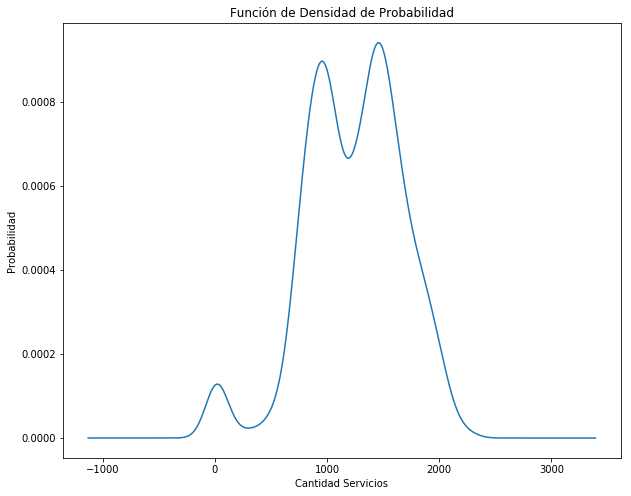

In [26]:
# Densidad 1
df.cantidad_servicios.plot(kind='kde',figsize=(10, 8))
plt.title('Función de Densidad de Probabilidad')
plt.xlabel('Cantidad Servicios')
plt.ylabel('Probabilidad')
plt.show()

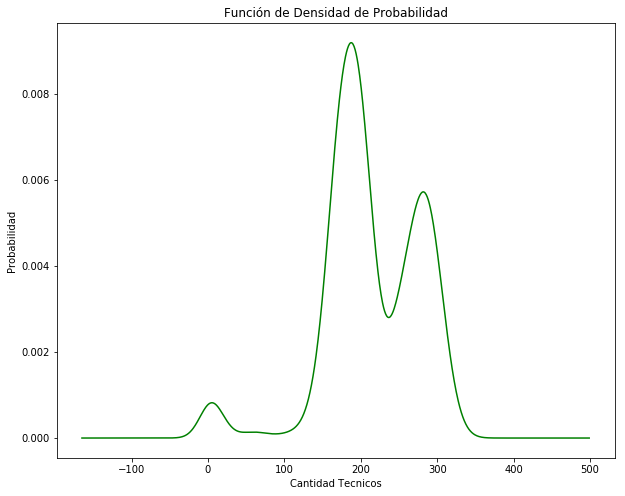

In [27]:
# Densidad 2
df.cantidad_tecnicos.plot(kind='kde',color='g',figsize=(10, 8))
plt.title('Función de Densidad de Probabilidad')
plt.xlabel('Cantidad Tecnicos')
plt.ylabel('Probabilidad')
plt.show()

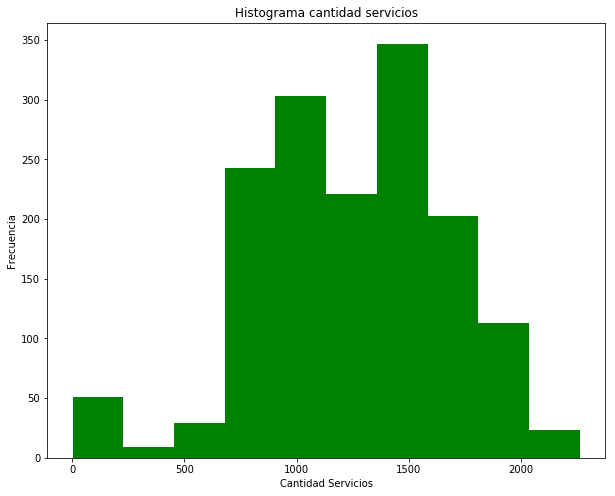

In [29]:
# Histograma actividades
df.cantidad_servicios.plot(kind='hist',color='g' ,figsize=(10, 8))
plt.title('Histograma cantidad servicios')
plt.xlabel('Cantidad Servicios')
plt.ylabel('Frecuencia')
plt.show()

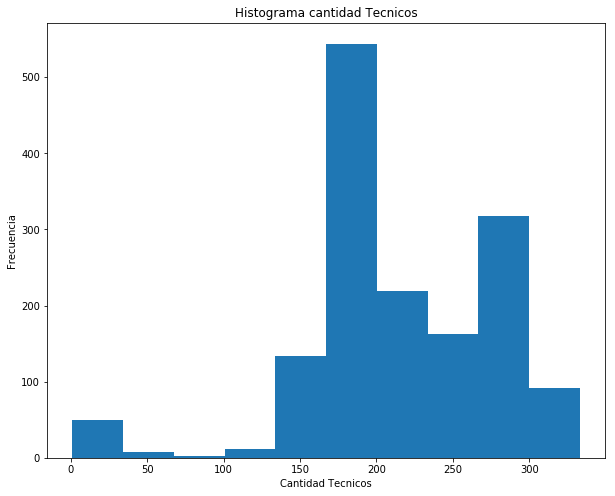

In [30]:
# Histograma tecnicos
df.cantidad_tecnicos.plot(kind='hist',figsize=(10, 8))
plt.title('Histograma cantidad Tecnicos')
plt.xlabel('Cantidad Tecnicos')
plt.ylabel('Frecuencia')
plt.show()

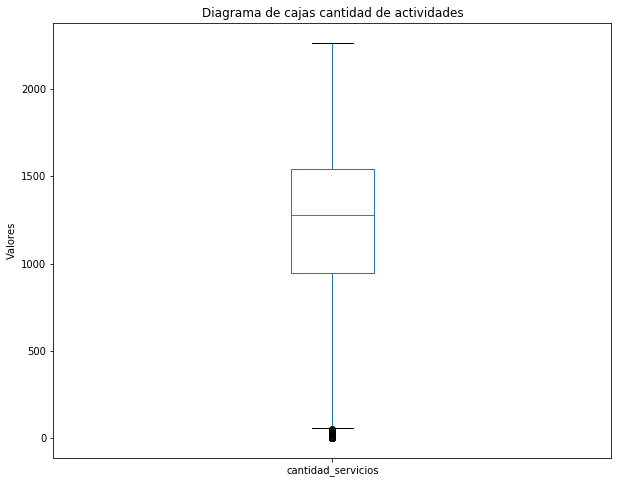

In [35]:
# Diagrama de cajas valores atipicos cantidad de actividades
df.cantidad_servicios.plot(kind='box',figsize=(10, 8))
plt.title('Diagrama de cajas cantidad de actividades')
plt.ylabel('Valores')
plt.show()

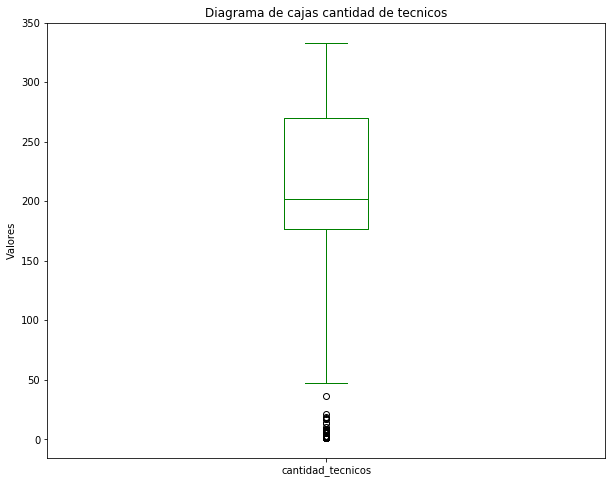

In [41]:
# Diagrama de cajas valores atipicos cantidad de tecnicos
df.cantidad_tecnicos.plot(kind='box', color='g', figsize=(10, 8))
plt.title('Diagrama de cajas cantidad de tecnicos')
plt.ylabel('Valores')
plt.show()

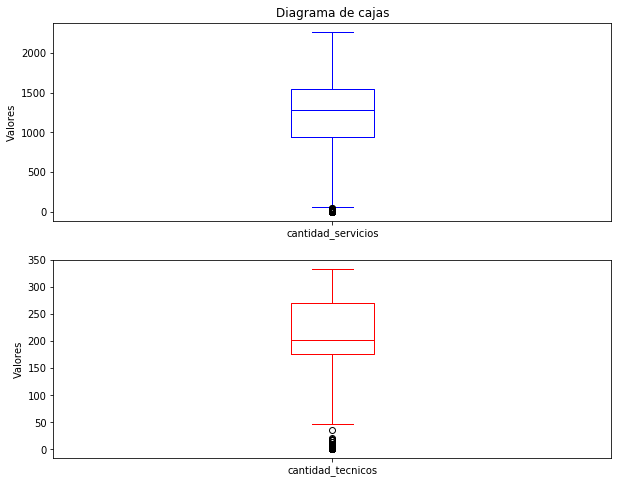

In [12]:
# Diagrama de cajas valores atipicos cantidad de tecnicos
plt.figure(1)

plt.subplot(211)
df.cantidad_servicios.plot(kind='box', color='b', figsize=(10, 8))
plt.title('Diagrama de cajas')
plt.ylabel('Valores')
plt.subplot(212)
df.cantidad_tecnicos.plot(kind='box', color='r', figsize=(10, 8))


plt.ylabel('Valores')

plt.show()

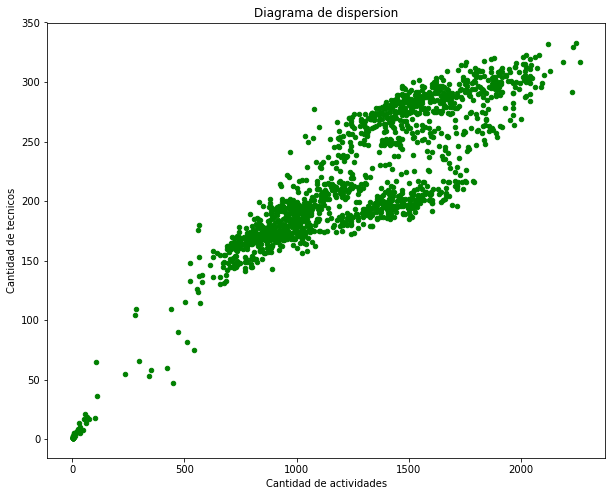

In [47]:
# Diagrama de dispersion
df.plot(kind='scatter',x='cantidad_servicios',y='cantidad_tecnicos',figsize=(10, 8),color='g')
plt.title('Diagrama de dispersion')
plt.xlabel('Cantidad de actividades')
plt.ylabel('Cantidad de tecnicos')
plt.show()

## Correlacion de variables

In [42]:
# Coeficiente de variacion Actividades
ss.variation(df.cantidad_servicios)

0.3469124343005351

In [43]:
# Coeficiente de variacion tecnicos
ss.variation(df.cantidad_tecnicos)

0.29547691022816214

In [44]:
# Covarianza
df.cov()

cantidad_servicios  cantidad_tecnicos
cantidad_servicios       185858.457225       24265.745115
cantidad_tecnicos         24265.745115        3985.383758

In [45]:
# Correlacion
df.corr(method='pearson')

cantidad_servicios  cantidad_tecnicos
cantidad_servicios            1.000000           0.891595
cantidad_tecnicos             0.891595           1.000000

# Medidas de asimetria

In [50]:
# Medida de asimetria sobre la media (indican si es o no una distribucion normal)
#Asimetria Asimetría negativa: la cola de la distribución se alarga para valores inferiores a la media
df = df.set_index('fecha')
ss.skew(df)


array([-0.48496439, -0.85994488])

In [51]:
#Kurtosis= los datos estan muy concentrados en la media, forma apuntada
ss.kurtosis(df)

array([0.41510192, 1.82231771])